In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# Reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

sel = [Measurement.date, Measurement.prcp]
last_year = session.query(*sel).filter(Measurement.date >= query_date).all()

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year, columns=['date', 'precipitation'])
last_year_df.set_index('date', inplace=True)
last_year_df.fillna(0.0, inplace=True)
last_year_df

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,0.00
2017-08-21,0.56


In [13]:
# Sort the dataframe by date
last_year_df.sort_values("date")
last_year_df

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,0.00
2017-08-21,0.56


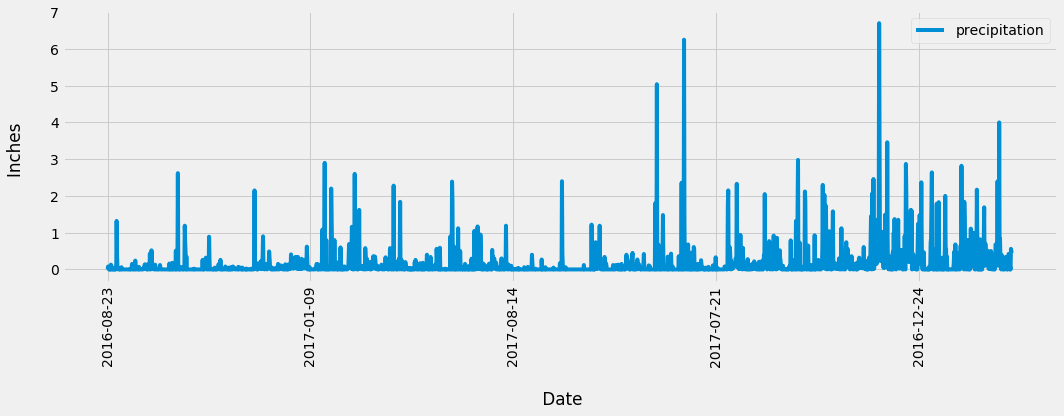

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
last_year_df.plot(rot="90", figsize=(15,6))
plt.xlabel("\n Date")
plt.ylabel("Inches \n")
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_df.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [16]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active

('USC00519281', 2772)

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').one()
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').one()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').one()

print(highest_temp)
print(lowest_temp)
print(average_temp)

(85.0,)
(54.0,)
(71.66378066378067,)


In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= query_date).all()

In [22]:
temp_observation_df = pd.DataFrame(temp_observation)
temp_observation_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


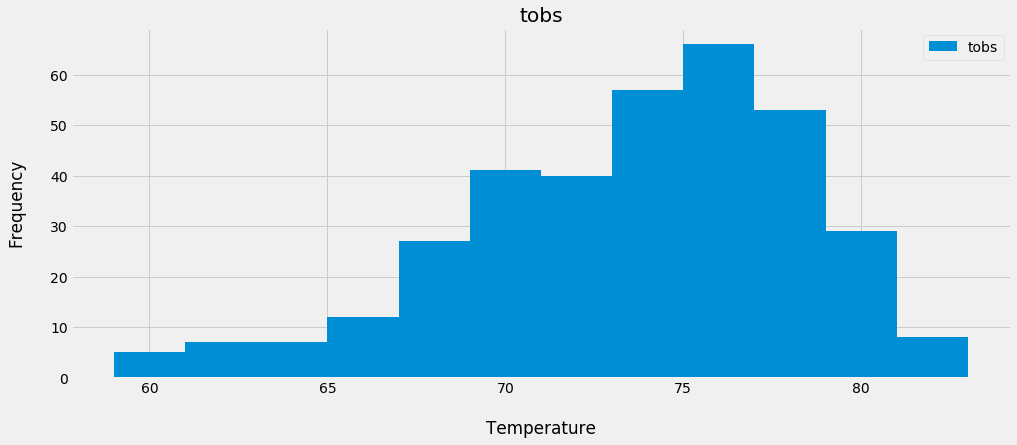

In [38]:
temp_observation_df.hist(bins=12, figsize=(15,6))
plt.xlabel("\nTemperature")
plt.ylabel("Frequency\n")
plt.legend(["tobs"])
plt.show()

# Close session

In [24]:
# Close Session
session.close()